# Visualize Networkss

In [17]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
import scipy.sparse as sp

# Graph Managment
import graph_tool.all as gt
import networkx as nx
from utils.subutils.Functions import *
from utils.Segregation import *

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from fa2.forceatlas2 import ForceAtlas2

# Miscellaneous
from glob import glob
from tqdm import tqdm
import random
import time

random.seed(2)

# Create ForceAtlas2 object with desired parameters
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [6]:
# Load the graph
test_file = "/mnt/disk2/Data/3_Day_Graphs/starting_2021-04-29.graphml"

# Load Grap
g = gt.load_graph(test_file)
#pos = gt.fruchterman_reingold_layout(g, n_iter=50)
#g.vp['Fruchterman layout'] = pos
g.set_directed(False)
g_nx = to_networkx(g)

date = test_file.split('.')[-2].split('/')[-1]

### Testing the package

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:10<00:00, 483.52it/s]

BarnesHut Approximation  took  6.81  seconds
Repulsion forces  took  2.75  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.10  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


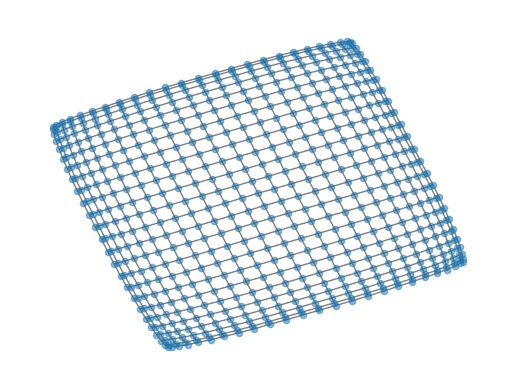

In [7]:
G = nx.grid_2d_graph(25, 25)
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=5000)
nx.draw_networkx(G, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

100%|██████████| 2000/2000 [00:02<00:00, 769.20it/s]

BarnesHut Approximation  took  1.30  seconds
Repulsion forces  took  0.85  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.27  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


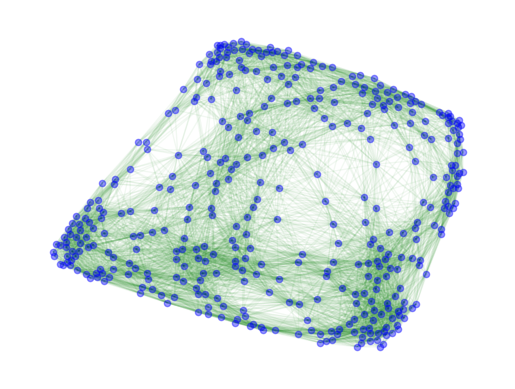

In [9]:
G = nx.random_geometric_graph(400, 0.2)
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

In [10]:
# Get rid of self loops
g_nx.remove_edges_from(nx.selfloop_edges(g_nx))

# Find all connected components, sorted by size
connected_components = sorted(nx.connected_components(g_nx), key=len, reverse=True)

# Get the largest and second largest connected components
largest_cc = connected_components[0]
second_largest_cc = connected_components[1] if len(connected_components) > 1 else set()

# Combine the two components
combined_cc = largest_cc.union(second_largest_cc)

# Create a subgraph from the combined components
subgraph = g_nx.subgraph(combined_cc)
largest_cc_subgraph = g_nx.subgraph(largest_cc)

In [11]:
# Manually gather information
num_nodes = g_nx.number_of_nodes()
num_edges = g_nx.number_of_edges()
average_degree = sum(dict(g_nx.degree()).values()) / num_nodes

# Print information
print('Big Graph')
print(f"Graph has {num_nodes} nodes and {num_edges} edges.")
print(f"Average degree: {average_degree:.2f}")
print('_________________________________________________________')

# Manually gather information
num_nodes = subgraph.number_of_nodes()
num_edges = subgraph.number_of_edges()
average_degree = sum(dict(subgraph.degree()).values()) / num_nodes

# Print information
print('Largest Component Graph')
print(f"Graph has {num_nodes} nodes and {num_edges} edges.")
print(f"Average degree: {average_degree:.2f}")
print('_________________________________________________________')

# Manually gather information
num_nodes = largest_cc_subgraph.number_of_nodes()
num_edges = largest_cc_subgraph.number_of_edges()
average_degree = sum(dict(largest_cc_subgraph.degree()).values()) / num_nodes

# Print information
print('Two Largest Component Graph')
print(f"Graph has {num_nodes} nodes and {num_edges} edges.")
print(f"Average degree: {average_degree:.2f}")
print('_________________________________________________________')

Big Graph
Graph has 30645 nodes and 524153 edges.
Average degree: 34.21
_________________________________________________________
Largest Component Graph
Graph has 30503 nodes and 524128 edges.
Average degree: 34.37
_________________________________________________________
Two Largest Component Graph
Graph has 30498 nodes and 524124 edges.
Average degree: 34.37
_________________________________________________________


In [12]:
# Color
color_map_dict = {
    'No Retweets': 'gray',
    'Izquierda': 'blue',
    'Derecha': 'red',
    'Centro': 'green'
}
color_map_node = [color_map_dict[subgraph.nodes[node]['Political Label']] for node in subgraph]

color_edge_map = [color_map_dict[subgraph.nodes(data=True)[edge[0]]['Political Label']] for edge in list(subgraph.edges(data=True))]

In [13]:
degrees = dict(subgraph.degree())
max_degree = max(degrees.values())

# Normalize the degrees to get alpha values
alpha_values = [(degree / max_degree) for degree in degrees.values()]

In [14]:
# Size

# Based on degree
node_degrees = [subgraph.degree(node) * 100 for node in subgraph.nodes()]
def normalize(x, max, min):
    return 100 * ((x - min)/(max - min))
max_deg = max(node_degrees)
min_deg = min(node_degrees)
node_size = list(map(lambda x: normalize(x, max_deg, min_deg), node_degrees))

# Based on Edge Property
weights = [edge[2]['Normal Weights'] for edge in list(subgraph.edges(data=True))]


In [38]:
# Initial positions
pos_dict = nx.get_node_attributes(subgraph, 'Fruchterman layout')

In [18]:
layout = forceatlas2.forceatlas2_networkx_layout(subgraph, pos=None, iterations=150)

100%|██████████| 150/150 [00:55<00:00,  2.69it/s]


BarnesHut Approximation  took  31.10  seconds
Repulsion forces  took  21.73  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  1.89  seconds
AdjustSpeedAndApplyForces step  took  0.07  seconds


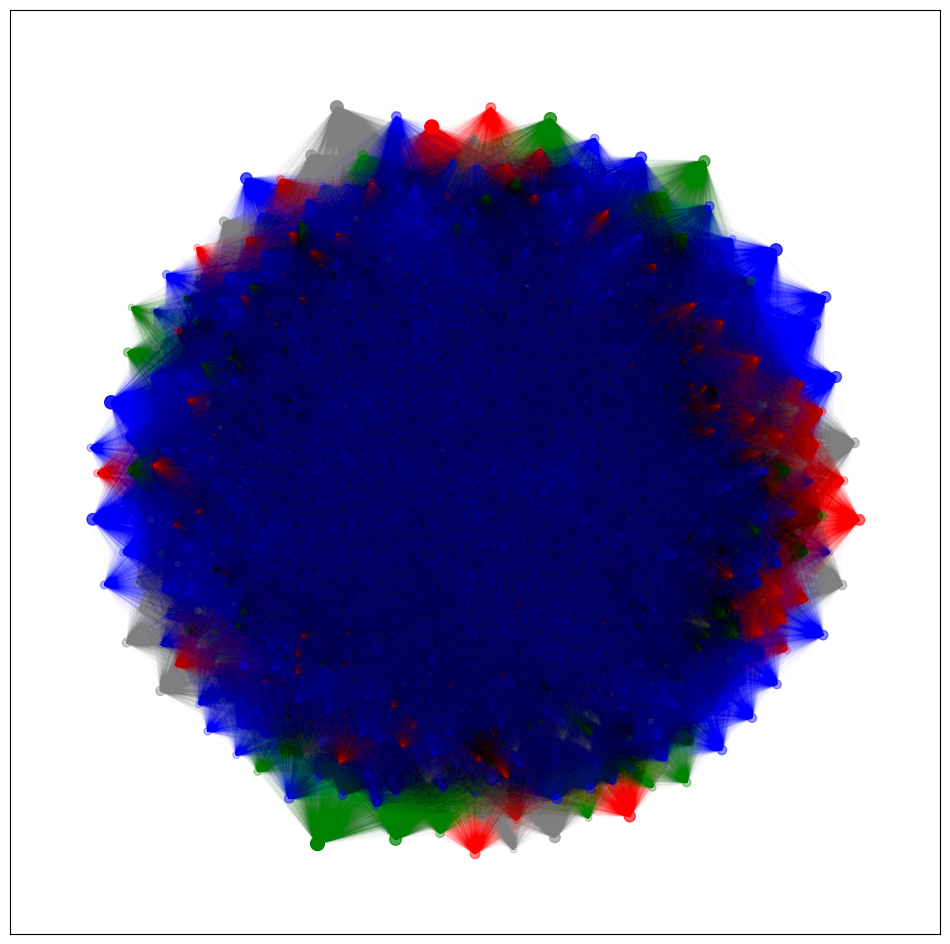

In [19]:
fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_nodes(subgraph, layout, node_color = color_map_node, node_size = node_size, ax = ax, alpha = alpha_values)
nx.draw_networkx_edges(subgraph, layout, edge_color=color_edge_map, alpha = 0.01)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))


nx.draw_networkx_edges(subgraph, layout, node_color = color_map, node_size = node_size, ax = ax, alpha = alpha_values)

In [ ]:
ls = []
files = glob('/mnt/disk2/Data/Daily_graphs/*.graphml')

for file in files:
    g = gt.load_graph(file)
    N = g.num_vertices()
    ls.append((file,N))

sorted_ls = sorted(ls, key=lambda x: x[1], reverse=True)
sorted_files = [g[0] for g in sorted_ls]

In [ ]:
times = []
for idx, file in tqdm(enumerate(sorted_files)):
    
    start_time = time.time()
    
    g = gt.load_graph(file)
    g_nx = to_networkx(g)
    date = file.split('.')[-2].split('/')[-1]
    
    # Node Size
    node_in_degree = [g_nx.in_degree(node) for node in g_nx.nodes]

    # For Layout Algorythim, calculate it as undirected
    g_nx_undir = g_nx.to_undirected()
    
    # Initalizice Layout
    if idx == 0:

        # Apply ForceAtlas2 layout algorithm First time
        layout = forceatlas2_networkx_layout(g_nx_undir, pos, niter=30)
        print('First Layout')
    
    else:

        # Apply ForceAtlas2 layout algorithm
        layout = forceatlas2_networkx_layout(g_nx_undir, pos, niter=15)
    
    # Re assign new map
    for key in layout:
        if key in pos:
            pos[key] = layout[key]
    
    # Draw the network using matplotlib
    nx.draw_networkx_nodes(g_nx_undir, layout, node_color=colors,
                                    node_size = node_in_degree,
                                    edgecolors=(0,0,0,0.1))

    # Display the plot
    plt.savefig(f'../{date}_FA2_viz.png') 
    
    if idx%10 == 0:
        print(f'Grafo número {idx}')
    else:
        pass
    
    end_time = time.time()
    t = end_time - start_time
    times.append(t)

In [ ]:
# Map Libraries
from branca.element import Figure
import folium as fl
from folium.plugins import MarkerCluster, FeatureGroupSubGroup, GroupedLayerControl

# Data Managment
import sqlite3
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
con = sqlite3.connect('../database.db')
cur = con.cursor()

In [ ]:
Properties = pd.read_sql_query('select * from Properties', con)
geometry = [Point(lon, lat) for lon, lat in zip(Properties['lon'], Properties['lat'])]
geoProperties = gpd.GeoDataFrame(Properties, geometry=geometry)
print(geoProperties.shape)
geoProperties.head()

In [ ]:
geoProperties['businessType'].value_counts()

In [ ]:
geoProperties['propertyType'].value_counts()

In [ ]:
def html_creator(data):
    bathrooms = data.bathroomsNumber
    rooms = data.roomsNumber
    parking = data.parkingNumber

    if data.bathroomsNumber < 1:
        bathrooms = 'N/A'
    if data.roomsNumber < 1:
        rooms = 'N/A'
    if data.parkingNumber < 1:
        parking = 'N/A'
    html_str = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Property Information</title>
        <style>
            table {{
                width: 100%;
                border-collapse: collapse;
                margin-top: 20px;
            }}

            th, td {{
                border: 1px solid #ddd;
                padding: 12px;
                text-align: left;
            }}

            th {{
                background-color: #f2f2f2;
            }}

            td.url {{
                background-color: #e6f7ff; /* Light blue for URLs */
            }}
        </style>
    </head>
    <body>

    <!-- Create a table to organize property information -->
    <table>
        <tr>
            <th>Attribute</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Precio para</td>
            <td>{str(data.businessType)}</td>
        </tr>
        <tr>
            <td>Precio</td>
            <td>$ {data.price:,}</td>
        </tr>
        <tr>
            <td>Area</td>
            <td>{str(data.area)} mt2</td>
        </tr>
        <tr>
            <td>Estrato</td>
            <td>{str(data.stratum)}</td>
        </tr>
        <tr>
            <td>Numero de alcobas</td>
            <td>{str(rooms)}</td>
        </tr>
        <tr>
            <td>Numero de baños</td>
            <td>{str(bathrooms)}</td>
        </tr>
        <tr>
            <td>Numero de Parqueaderos</td>
            <td>{str(parking)}</td>
        </tr>
        <tr>
            <td>Tipo de Propiedad</td>
            <td>{str(data.propertyType)}</td>
        </tr>
        <tr>
            <td class="url">URL</td>
            <td class="url"><a href="{str(data.url)}">Enlace</a></td>
        </tr>
    </table>

    </body>
    </html>
    """
    return html_str

In [ ]:
min_lon, max_lon =  -74.2508, -74.0041
min_lat, max_lat = 4.4697, 4.8529
bog_location = (4.6479362,-74.0868797)

m = fl.Map(
    location = (4.6479362,-74.0868797),
    zoom_start=11,
    control_scale=True,
    zoom_control=False,
    min_lat=min_lat,
    max_lat=max_lat,
    min_lon=min_lon,
    max_lon=max_lon)

In [ ]:
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: auto; z-index:9999; font-size:14px;">
<i class="fa fa-home fa-2x" style="color:blue"></i> - Apartamento<br>
<i class="fa fa-home fa-2x" style="color:green"></i> - Casa<br>
<i class="fa fa-home fa-2x" style="color:red"></i> - Oficina<br>
<i class="fa fa-home fa-2x" style="color:purple"></i> - Bodega<br>
<i class="fa fa-home fa-2x" style="color:orange"></i> - Local Comercial<br>
<i class="fa fa-home fa-2x" style="color:gray"></i> - Lote o Casalote<br>
<i class="fa fa-home fa-2x" style="color:cyan"></i> - Edificio de Apartamentos<br>
<i class="fa fa-home fa-2x" style="color:pink"></i> - Consultorio<br>
<i class="fa fa-home fa-2x" style="color:brown"></i> - Edificio de Oficinas<br>
</div>
"""

In [ ]:
cluster = MarkerCluster(control=False).add_to(m)
clusters_dict = {}
business_list = geoProperties['businessType'].unique()
property_list = geoProperties['propertyType'].unique()
for b in business_list:
    clusters_dict[f"{b}"] = FeatureGroupSubGroup(cluster, name = p).add_to(m)
    for p in property_list:
        clusters_dict[f"{b}_sub_{p}"] = FeatureGroupSubGroup(cluster, name = p).add_to(m)

In [ ]:
clusters_dict

In [ ]:
propertyType_mapping = {
    'Apartamento': 'blue',
    'Casa': 'green',
    'Oficina': 'red',
    'Bodega': 'purple',
    'Local Comercial': 'orange',
    'Lote o Casalote': 'gray',
    'Edificio de Apartamentos': 'cadetblue',
    'Consultorio': 'pink',
    'Edificio de Oficinas': 'beige'
}

In [ ]:
for i in geoProperties.itertuples():
    # Get custom settings
    iframe_html = html_creator(i)

    # Add aesthetics to marker
    icon = fl.Icon(icon='house', color = propertyType_mapping[i.propertyType])
    iframe = fl.IFrame(html = iframe_html, width=400, height=600)
    popup = fl.Popup(iframe)
    marker = fl.Marker(location=(i.lat, i.lon),
              icon=icon, popup=fl.Popup(iframe), tags = [i.businessType])
    
    # for b in business_list:
    #     if i.businessType == b:
    #         clusters_dict[f"{b}"].add_child(marker)

In [ ]:
# GroupedLayerControl(
#     groups = {'Venta': [globals()[f"Venta_sub_{p}"] for p in property_list],
#               'Arriendo': [globals()[f"Arriendo_sub_{p}"] for p in property_list],
#               'Venta y Arriendo': [globals()[f"Venta y arriendo_sub_{p}"] for p in property_list]},
#     exclusive_groups=False,
#     collapsed=True,
# ).add_to(m)

fl.plugins.TagFilterButton(['Venta', 'Arriendo', 'Venta y arriendo']).add_to(m)

fl.LayerControl().add_to(m)
m.get_root().html.add_child(fl.Element(legend_html))
m